1. Импорт необходимых библиотек

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2. Загрузка данных

In [60]:
train_load = pd.read_csv('train.csv')
test_load = pd.read_csv('test.csv')

train_load['ApplicationDate'] = pd.to_datetime(train_load['ApplicationDate'], format='%Y-%m-%d')
test_load['ApplicationDate'] = pd.to_datetime(test_load['ApplicationDate'], format='%Y-%m-%d')

train_load['ApplicationYear'] = train_load['ApplicationDate'].dt.year
train_load['ApplicationMonth'] = train_load['ApplicationDate'].dt.month
train_load['ApplicationDay'] = train_load['ApplicationDate'].dt.day

test_load['ApplicationYear'] = test_load['ApplicationDate'].dt.year
test_load['ApplicationMonth'] = test_load['ApplicationDate'].dt.month
test_load['ApplicationDay'] = test_load['ApplicationDate'].dt.day

train_load.drop(columns=['ApplicationDate'], inplace=True)
test_load.drop(columns=['ApplicationDate'], inplace=True)

train_load.head()


print(train_load.isnull().sum())

Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel                 530
Experience                     530
NetWorth            

3. Преобразовываем категориальне переменные

In [61]:
train_load = pd.get_dummies(train_load, columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel'], drop_first=True)
test_load = pd.get_dummies(test_load, columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel'], drop_first=True)

4. Уберу пропуски и повторки, так как их немного, однако можно было заполнить медианным значением

In [62]:
train_load = train_load.dropna()
train_load.drop_duplicates(inplace=True)

3. Предобработка данных

In [63]:
numeric_cols = train_load.select_dtypes(include=[np.number]).columns
train_load[numeric_cols] = train_load[numeric_cols].fillna(train_load[numeric_cols].mean())

numeric_cols_test = test_load.select_dtypes(include=[np.number]).columns
test_load[numeric_cols_test] = test_load[numeric_cols_test].fillna(test_load[numeric_cols_test].mean())
# Отделение целевой переменной и признаков
X = train_load.drop(columns=['RiskScore'])
y = train_load['RiskScore']

4. Разделение данных на обучающую и тестовую выборки

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

5. Удаление признаков с кореляцией от 0.8. Нет значимой линейной связи между переменными.

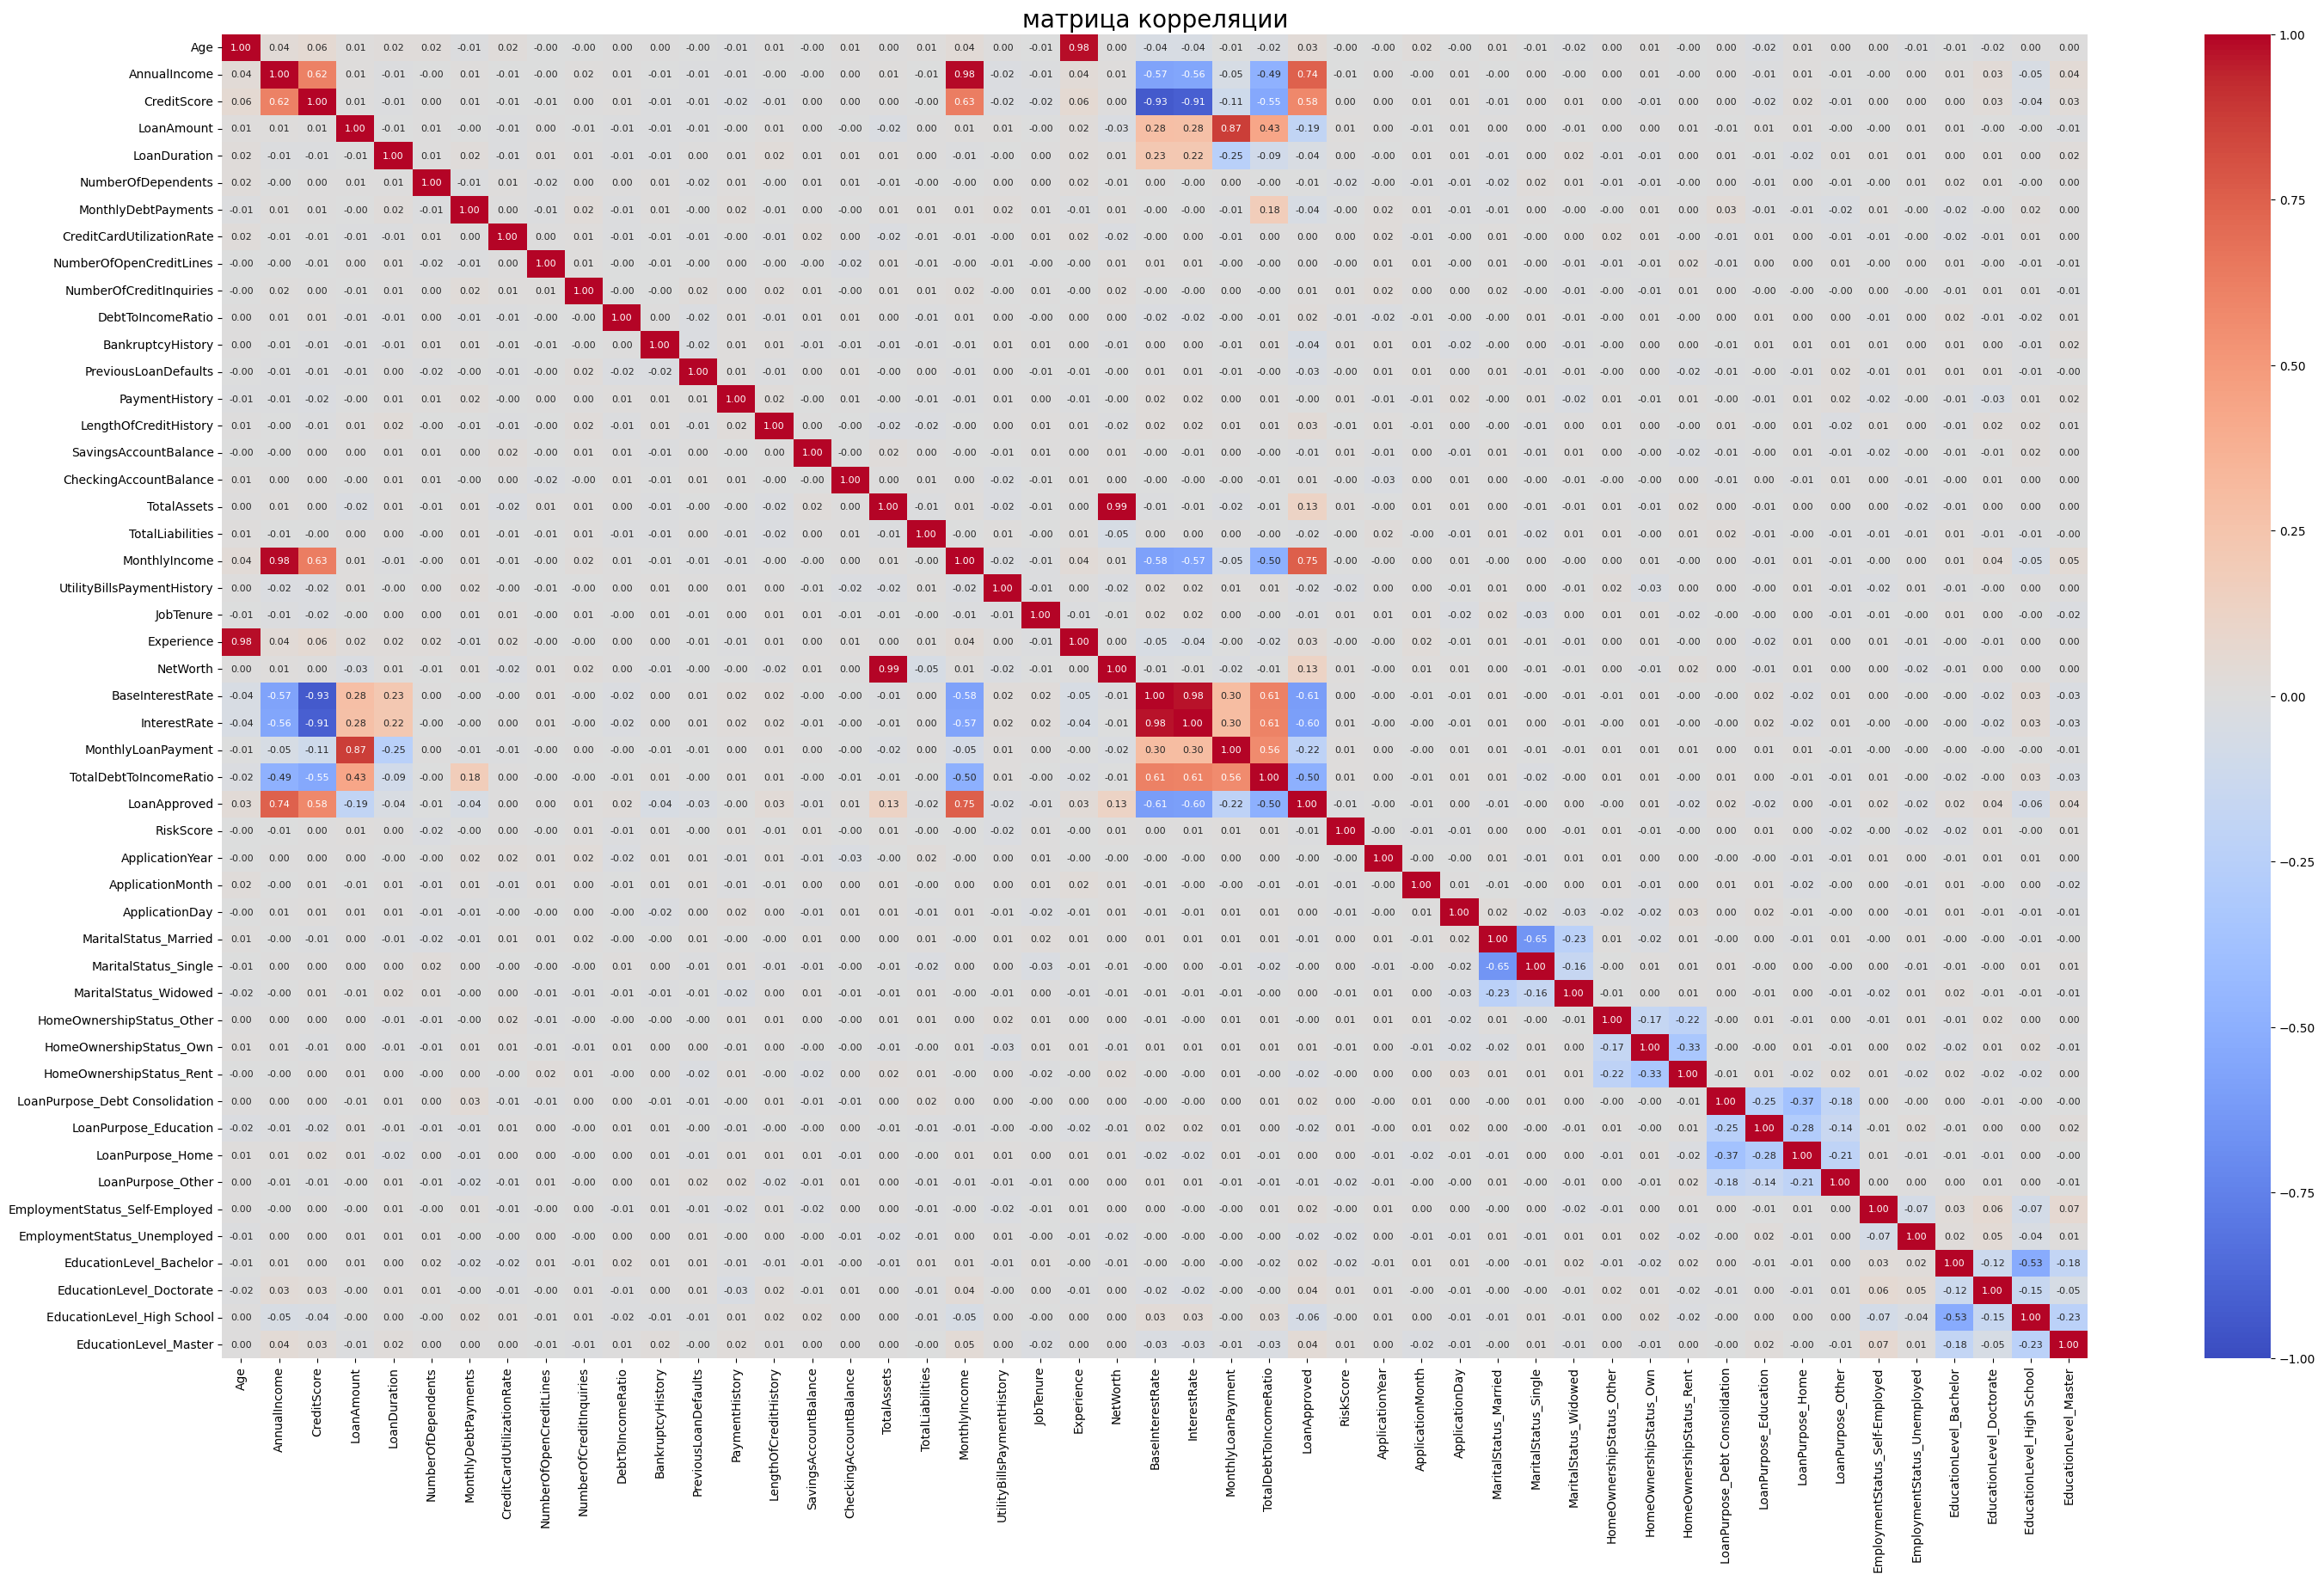

['MonthlyIncome', 'Experience', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment']


In [65]:
corr_mtrx = train_load.corr()

plt.figure(figsize=(35, 20))
sns.heatmap(corr_mtrx, annot=True, fmt=".2f", annot_kws={"size": 8}, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("матрица корреляции", fontsize=20)
plt.show()


correlation_threshold = 0.8 #методом проб

corr_mtrx = train_load.corr().abs()

upper_tri = corr_mtrx.where(np.triu(np.ones(corr_mtrx.shape), k=1).astype(bool))

# высококоррелирующие признаки, без 'NetWorth'
to_drop = [
    column for column in upper_tri.columns 
    if any(upper_tri[column] > correlation_threshold) and column != 'NetWorth'
]

# Удаляем высококоррелирующие признаки 
train_load = train_load.drop(columns=to_drop)
test_load = test_load.drop(columns=to_drop)
print(to_drop)


Нормализируем age

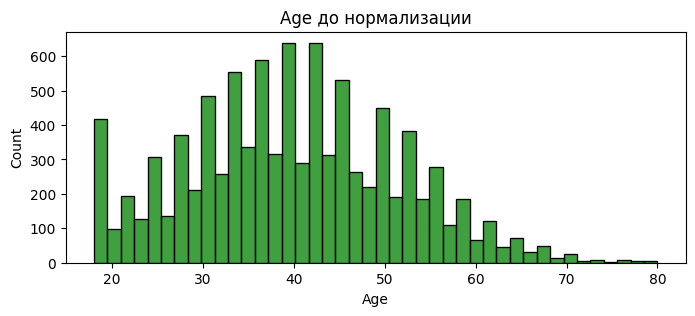

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
plt.figure(figsize=(8, 3))
sns.histplot(train_load['Age'],  color='green')
plt.title("Age до нормализации")
plt.show()

Распределение нормальное, используем StandardScaler нормализацию

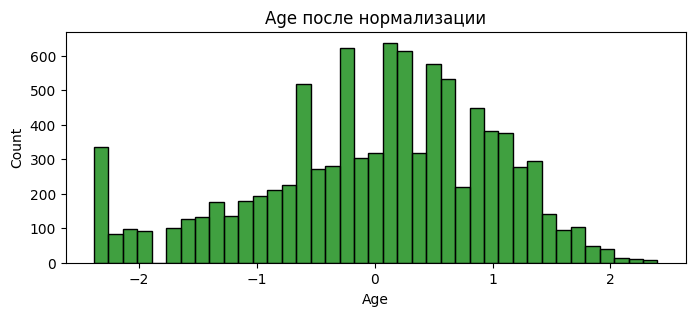

In [67]:
train_load['Age'] = np.log1p(train_load['Age'])
test_load['Age'] = np.log1p(test_load['Age'])
train_load['Age'] = StandardScaler().fit_transform(train_load[['Age']])
test_load['Age'] = StandardScaler().fit_transform(test_load[['Age']])

plt.figure(figsize=(8, 3))
sns.histplot(train_load['Age'],  color='green')
plt.title("Age после нормализации")
plt.show()

ApplicationYear распределение

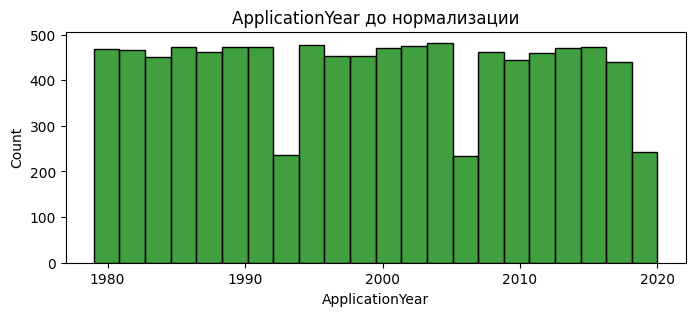

In [68]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['ApplicationYear'],  color='green')
plt.title("ApplicationYear до нормализации")
plt.show()

равномерное - использую MinMaxScaler (аналогично для месяца и дня)

In [69]:
train_load['ApplicationMonth'] = MinMaxScaler().fit_transform(train_load[['ApplicationMonth']])
test_load['ApplicationMonth'] = MinMaxScaler().fit_transform(test_load[['ApplicationMonth']])
train_load['ApplicationYear'] = MinMaxScaler().fit_transform(train_load[['ApplicationYear']])
test_load['ApplicationYear'] = MinMaxScaler().fit_transform(test_load[['ApplicationYear']])
train_load['ApplicationDay'] = MinMaxScaler().fit_transform(train_load[['ApplicationDay']])
test_load['ApplicationDay'] = MinMaxScaler().fit_transform(test_load[['ApplicationDay']])

AnnualIncome

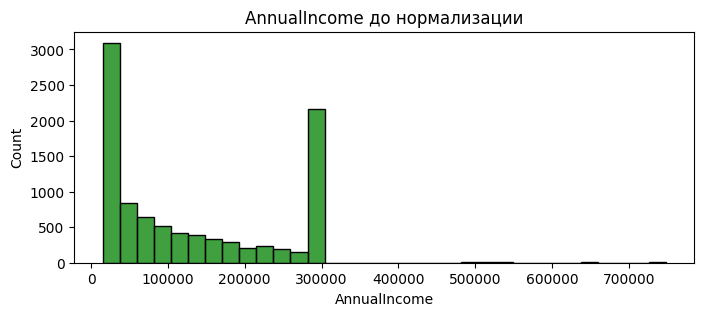

In [70]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['AnnualIncome'],  color='green')
plt.title("AnnualIncome до нормализации")
plt.show()


равномерное - используем MinMaxScaler

In [71]:
train_load['AnnualIncome'] = MinMaxScaler().fit_transform(train_load[['AnnualIncome']])
test_load['AnnualIncome'] = MinMaxScaler().fit_transform(test_load[['AnnualIncome']])

creditStore:

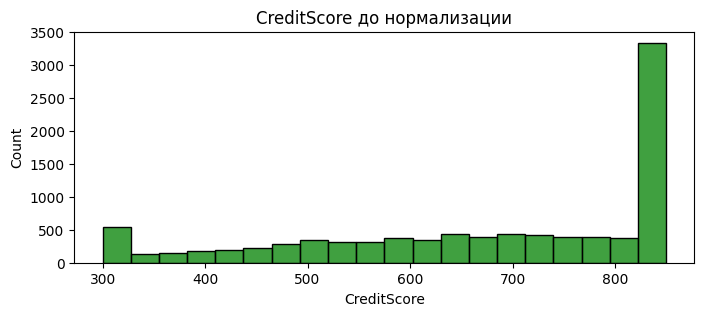

In [72]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['CreditScore'],  color='green')
plt.title("CreditScore до нормализации")
plt.show()

равномерное - используем MinMaxScaler

In [73]:
train_load['CreditScore'] = MinMaxScaler().fit_transform(train_load[['CreditScore']])
test_load['CreditScore'] = MinMaxScaler().fit_transform(test_load[['CreditScore']])

LoanAmount

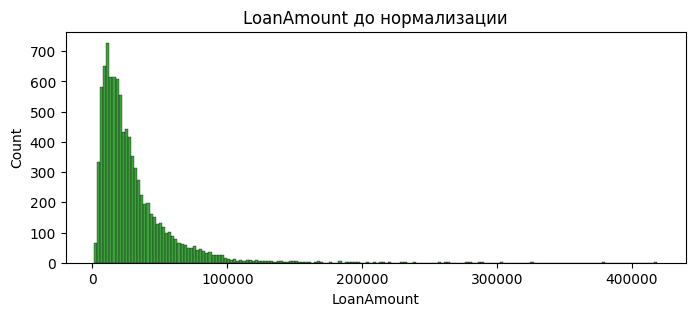

In [74]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['LoanAmount'],  color='green')
plt.title("LoanAmount до нормализации")
plt.show()

экспонента - прологарифмируем

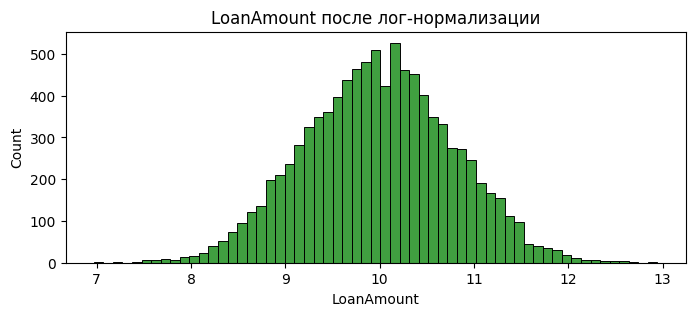

In [75]:
train_load['LoanAmount'] = np.log1p(train_load['LoanAmount'])
test_load['LoanAmount'] = np.log1p(test_load['LoanAmount'])

plt.figure(figsize=(8, 3))
sns.histplot(train_load['LoanAmount'],  color='green')
plt.title("LoanAmount после лог-нормализации")
plt.show()

нормальное - используем StandardScaler

In [76]:
train_load['LoanAmount'] = StandardScaler().fit_transform(train_load[['LoanAmount']])
test_load['LoanAmount'] = StandardScaler().fit_transform(test_load[['LoanAmount']])

LoanDuration

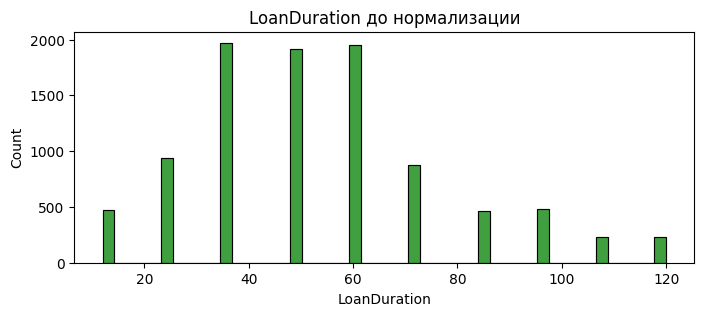

In [77]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['LoanDuration'], color='green')
plt.title("LoanDuration до нормализации")
plt.show()

нормальное - используем StandardScaler

In [78]:
train_load['LoanDuration'] = StandardScaler().fit_transform(train_load[['LoanDuration']])
test_load['LoanDuration'] = StandardScaler().fit_transform(test_load[['LoanDuration']])

Категориальные не нормируем, NumberOfDependents:

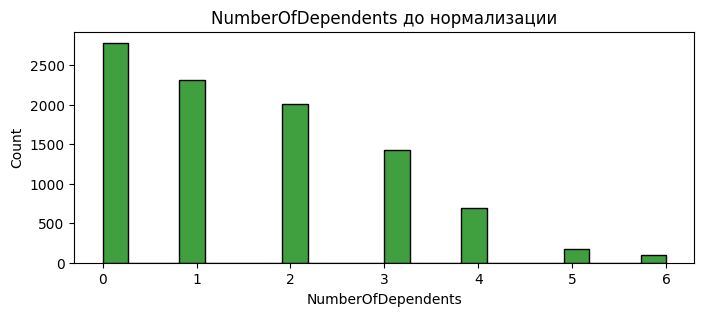

In [79]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['NumberOfDependents'], color='green')
plt.title("NumberOfDependents до нормализации")
plt.show()

использую minMaxScaler

In [80]:
train_load['NumberOfDependents'] = MinMaxScaler().fit_transform(train_load[['NumberOfDependents']])
test_load['NumberOfDependents'] = MinMaxScaler().fit_transform(test_load[['NumberOfDependents']])

MonthlyDebtPayments:

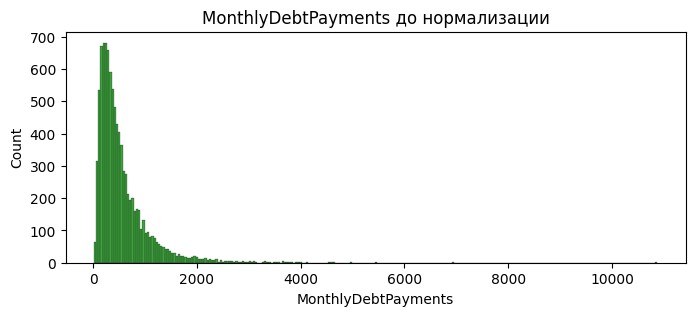

In [81]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['MonthlyDebtPayments'], color='green')
plt.title("MonthlyDebtPayments до нормализации")
plt.show()


экспонента - логарифмирую и использую StandardScaler нормализацию

In [82]:
train_load['MonthlyDebtPayments'] = np.log1p(train_load['MonthlyDebtPayments'])
test_load['MonthlyDebtPayments'] = np.log1p(test_load['MonthlyDebtPayments'])

train_load['MonthlyDebtPayments'] = StandardScaler().fit_transform(train_load[['MonthlyDebtPayments']])
test_load['MonthlyDebtPayments'] = StandardScaler().fit_transform(test_load[['MonthlyDebtPayments']])

CreditCardUtilizationRate:

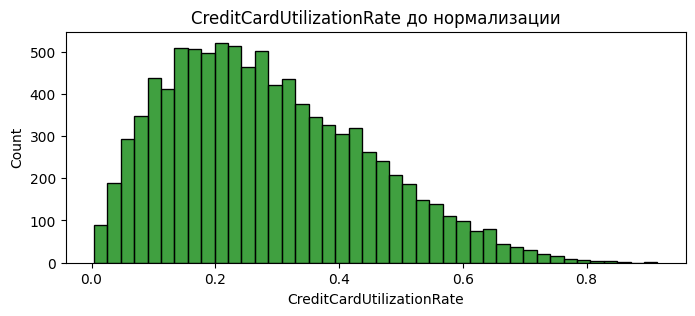

In [83]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['CreditCardUtilizationRate'], color='green')
plt.title("CreditCardUtilizationRate до нормализации")
plt.show()

нормальное - используем StandardScaler

In [84]:
train_load['CreditCardUtilizationRate'] = StandardScaler().fit_transform(train_load[['CreditCardUtilizationRate']])
test_load['CreditCardUtilizationRate'] = StandardScaler().fit_transform(test_load[['CreditCardUtilizationRate']])

NumberOfOpenCreditLines:

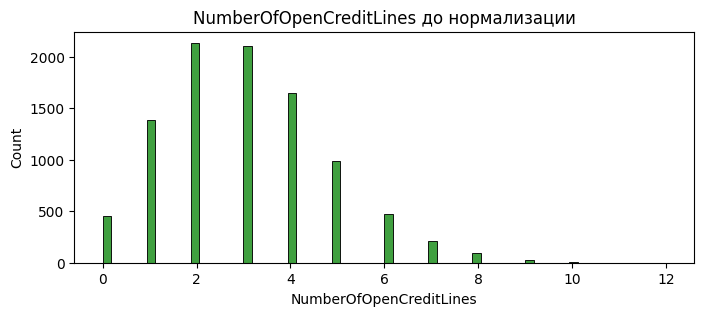

In [85]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['NumberOfOpenCreditLines'], color='green')
plt.title("NumberOfOpenCreditLines до нормализации")
plt.show()

нормальное - используем StandardScaler

In [86]:
train_load['NumberOfOpenCreditLines'] = StandardScaler().fit_transform(train_load[['NumberOfOpenCreditLines']])
test_load['NumberOfOpenCreditLines'] = StandardScaler().fit_transform(test_load[['NumberOfOpenCreditLines']])

NumberOfCreditInquiries:

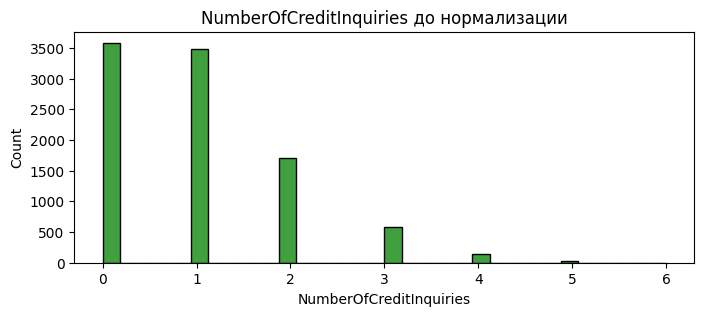

In [87]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['NumberOfCreditInquiries'], color='green')
plt.title("NumberOfCreditInquiries до нормализации")
plt.show()

используем StandardScaler

In [88]:
train_load['NumberOfCreditInquiries'] = StandardScaler().fit_transform(train_load[['NumberOfCreditInquiries']])
test_load['NumberOfCreditInquiries'] = StandardScaler().fit_transform(test_load[['NumberOfCreditInquiries']])

DebtToIncomeRatio:

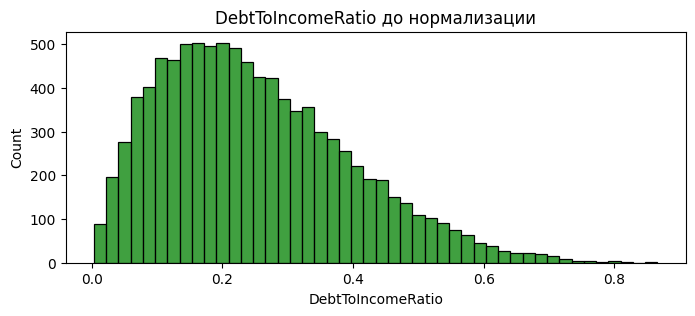

In [89]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['DebtToIncomeRatio'], color='green')
plt.title("DebtToIncomeRatio до нормализации")
plt.show()

нормальное - используем StandardScaler

In [90]:
train_load['DebtToIncomeRatio'] = StandardScaler().fit_transform(train_load[['DebtToIncomeRatio']])
test_load['DebtToIncomeRatio'] = StandardScaler().fit_transform(test_load[['DebtToIncomeRatio']])

PaymentHistory:

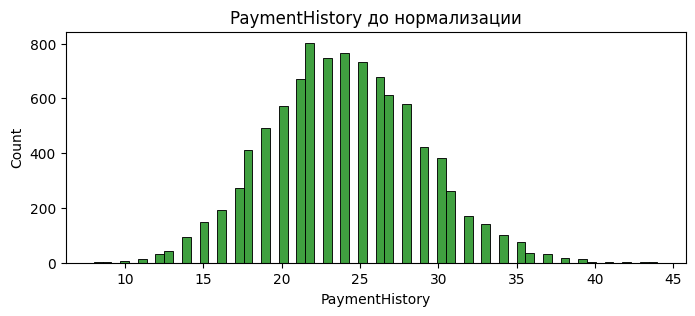

In [91]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['PaymentHistory'], color='green')
plt.title("PaymentHistory до нормализации")
plt.show()

нормальное - используем StandardScaler

In [92]:
train_load['PaymentHistory'] = StandardScaler().fit_transform(train_load[['PaymentHistory']])
test_load['PaymentHistory'] = StandardScaler().fit_transform(test_load[['PaymentHistory']])

LengthOfCreditHistory:

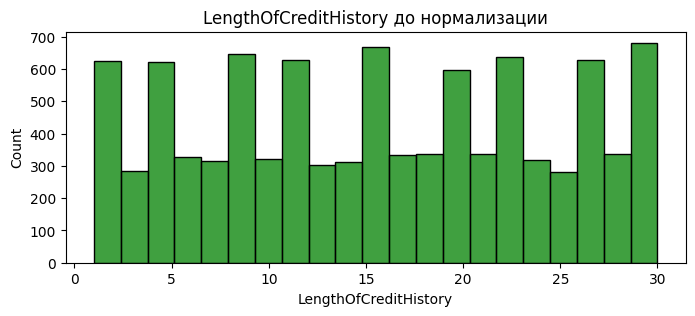

In [93]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['LengthOfCreditHistory'], color='green')
plt.title("LengthOfCreditHistory до нормализации")
plt.show()

равномерное - используем MinMaxScaler

In [94]:
train_load['LengthOfCreditHistory'] = MinMaxScaler().fit_transform(train_load[['LengthOfCreditHistory']])
test_load['LengthOfCreditHistory'] = MinMaxScaler().fit_transform(test_load[['LengthOfCreditHistory']])

SavingsAccountBalance:

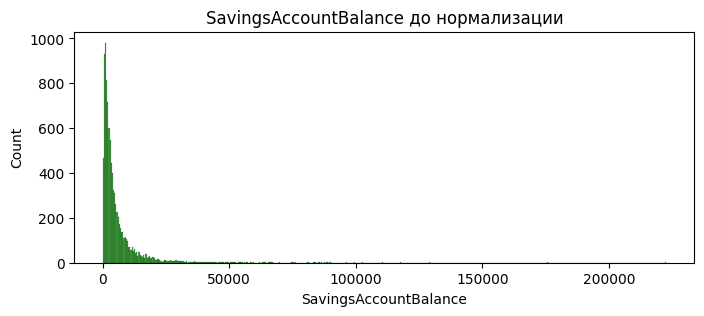

In [95]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['SavingsAccountBalance'], color='green')
plt.title("SavingsAccountBalance до нормализации")
plt.show()


экспоненциальное - логарифмирую и использую StandardScaler

In [96]:
train_load['SavingsAccountBalance'] = np.log1p(train_load['SavingsAccountBalance'])
test_load['SavingsAccountBalance'] = np.log1p(test_load['SavingsAccountBalance'])
train_load['SavingsAccountBalance'] = StandardScaler().fit_transform(train_load[['SavingsAccountBalance']])
test_load['SavingsAccountBalance'] = StandardScaler().fit_transform(test_load[['SavingsAccountBalance']])

CheckingAccountBalance:

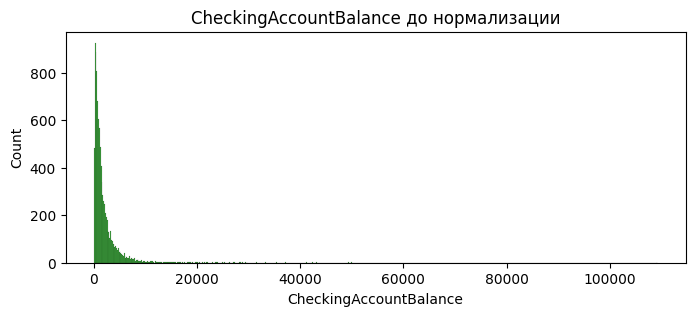

In [97]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['CheckingAccountBalance'], color='green')
plt.title("CheckingAccountBalance до нормализации")
plt.show()

экспоненциальное - логарифмирую и использую StandardScaler

In [98]:
train_load['CheckingAccountBalance'] = np.log1p(train_load['CheckingAccountBalance'])
test_load['CheckingAccountBalance'] = np.log1p(test_load['CheckingAccountBalance'])
train_load['CheckingAccountBalance'] = StandardScaler().fit_transform(train_load[['CheckingAccountBalance']])
test_load['CheckingAccountBalance'] = StandardScaler().fit_transform(test_load[['CheckingAccountBalance']])

TotalAssets:

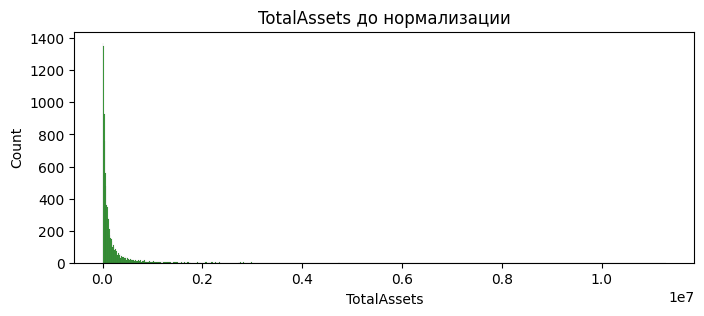

In [99]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['TotalAssets'], color='green')
plt.title("TotalAssets до нормализации")
plt.show()

экспоненциальное - логарифмирую и использую StandardScaler

In [100]:
train_load['TotalAssets'] = np.log1p(train_load['TotalAssets'])
test_load['TotalAssets'] = np.log1p(test_load['TotalAssets'])
train_load['TotalAssets'] = StandardScaler().fit_transform(train_load[['TotalAssets']])
test_load['TotalAssets'] = StandardScaler().fit_transform(test_load[['TotalAssets']])

TotalLiabilities:

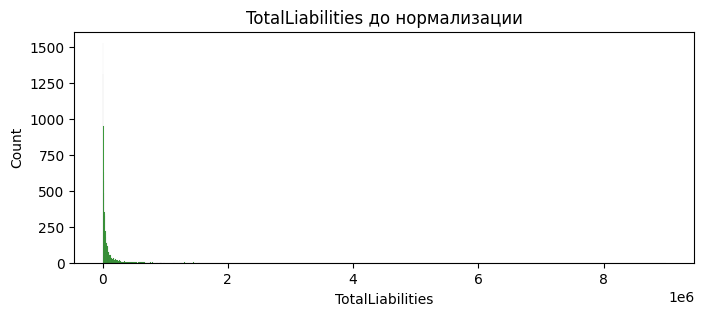

In [101]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['TotalLiabilities'], color='green')
plt.title("TotalLiabilities до нормализации")
plt.show()

экспоненциальное - логарифмирую и использую StandardScaler

In [102]:
train_load['TotalLiabilities'] = np.log1p(train_load['TotalLiabilities'])
test_load['TotalLiabilities'] = np.log1p(test_load['TotalLiabilities'])
train_load['TotalLiabilities'] = StandardScaler().fit_transform(train_load[['TotalLiabilities']])
test_load['TotalLiabilities'] = StandardScaler().fit_transform(test_load[['TotalLiabilities']])

JobTenure

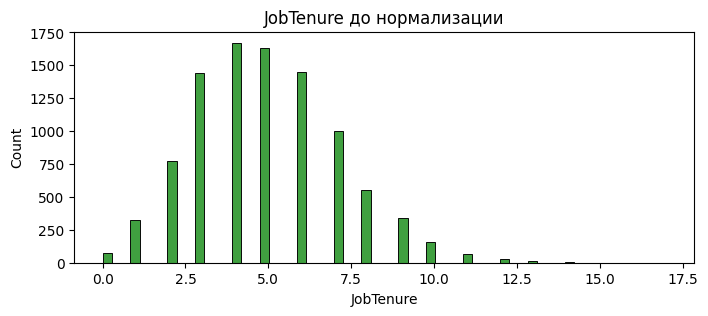

In [103]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['JobTenure'], color='green')
plt.title("JobTenure до нормализации")
plt.show()

нормальное - использую StandardScaler

In [104]:
train_load['JobTenure'] = StandardScaler().fit_transform(train_load[['JobTenure']])
test_load['JobTenure'] = StandardScaler().fit_transform(test_load[['JobTenure']])

TotalDebtToIncomeRatio:

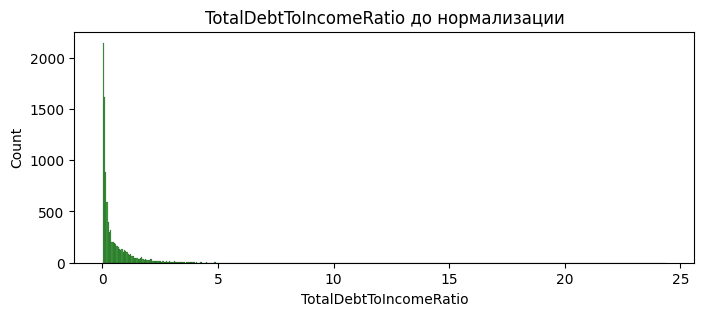

In [105]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['TotalDebtToIncomeRatio'], color='green')
plt.title("TotalDebtToIncomeRatio до нормализации")
plt.show()

экспоненциальное - логарифмирую и использую StandardScaler

In [106]:
train_load['TotalDebtToIncomeRatio'] = np.log1p(train_load['TotalDebtToIncomeRatio'])
test_load['TotalDebtToIncomeRatio'] = np.log1p(test_load['TotalDebtToIncomeRatio'])
train_load['TotalDebtToIncomeRatio'] = StandardScaler().fit_transform(train_load[['TotalDebtToIncomeRatio']])
test_load['TotalDebtToIncomeRatio'] = StandardScaler().fit_transform(test_load[['TotalDebtToIncomeRatio']])

RiskScore:

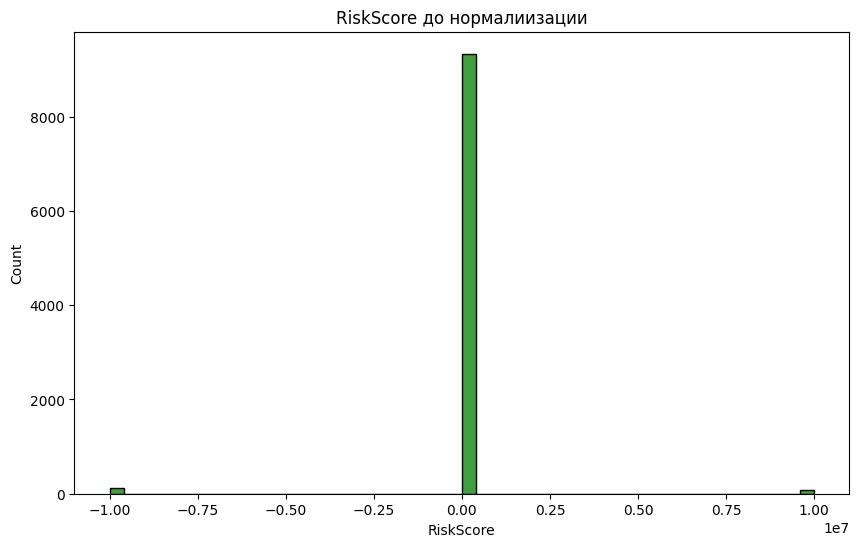

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(train_load['RiskScore'], color='green', bins=50)
plt.title("RiskScore до нормалиизации")
plt.show()

Interquartile Range

In [108]:
QuartileMeaning1 = train_load['RiskScore'].quantile(0.25)
QuartileMeaning3 = train_load['RiskScore'].quantile(0.75)
InterquartileRange = QuartileMeaning3 - QuartileMeaning1 

lower = QuartileMeaning1 - 1.5 * InterquartileRange
upper = QuartileMeaning3 + 1.5 * InterquartileRange

train_load = train_load[(train_load['RiskScore'] >= lower) & (train_load['RiskScore'] <= upper)]

5. Обучение модели и свой класс линейный классификатор

In [121]:
class SimpleLinearModel:
    def __init__(self, step_size=0.01, num_iterations=1000):
        self.step_size = step_size
        self.num_iterations = num_iterations

    def train(self, features, labels):
        self.params = np.zeros(features.shape[1])
        self.offset = 0

        for _ in range(self.num_iterations):
            linear_output = np.dot(features, self.params) + self.offset
            predictions = self._activation_function(linear_output)
            
            gradient_weights = np.dot(features.T, (predictions - labels)) / len(labels)
            gradient_bias = np.sum(predictions - labels) / len(labels)
            
            self.params -= self.step_size * gradient_weights
            self.offset -= self.step_size * gradient_bias

    def classify(self, features):
        linear_output = np.dot(features, self.params) + self.offset
        predictions = self._activation_function(linear_output)
        return (predictions >= 0.5).astype(int)

    def _activation_function(self, x):
        x = np.asarray(x, dtype=float)
        return 1 / (1 + np.exp(-x))


Simple Linear Model metrics:
Precision: 92.76985743380855
Recall: 97.01810436634717
F1-Score: 94.84643414888079
Accuracy: 94.69737546866631


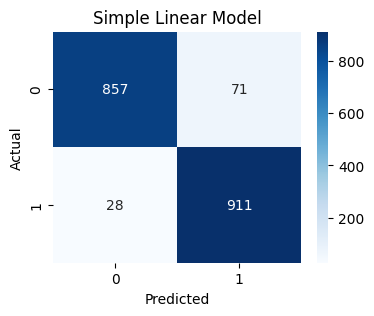

Logistic Regression metrics:
Precision: 98.83966244725738
Recall: 99.78700745473908
F1-Score: 99.31107578166402
Accuracy: 99.30369576861274


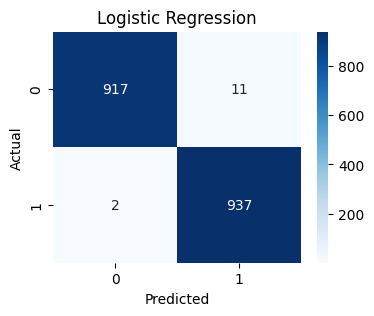

SVM metrics:
Precision: 98.62579281183932
Recall: 99.36102236421725
F1-Score: 98.9920424403183
Accuracy: 98.98232458489555


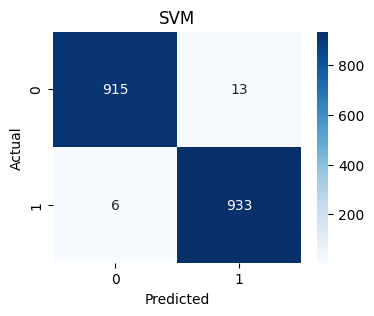

Decision Tree metrics:
Precision: 98.09322033898306
Recall: 98.61554845580405
F1-Score: 98.35369091874668
Accuracy: 98.33958221746116


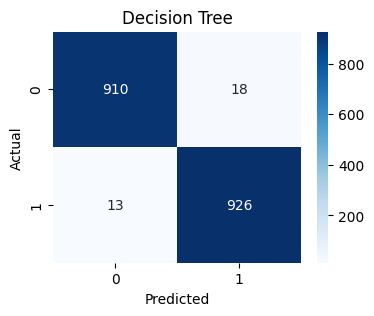

Random Forest metrics:
Precision: 97.56613756613757
Recall: 98.18956336528221
F1-Score: 97.87685774946921
Accuracy: 97.85752544188537


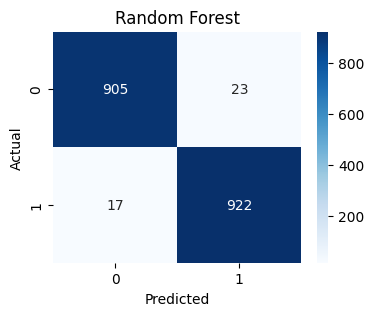

Gradient Boosting (sklearn) metrics:
Precision: 98.63157894736842
Recall: 99.78700745473908
F1-Score: 99.20592906299629
Accuracy: 99.19657204070703


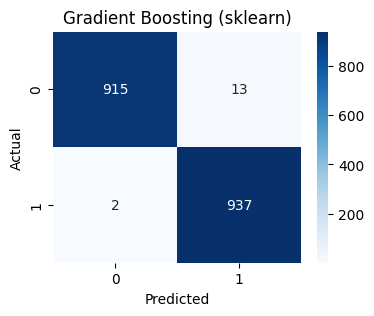

[LightGBM] [Info] Number of positive: 3850, number of negative: 3615
[LightGBM] [Info] Total Bins 3876
[LightGBM] [Info] Number of data points in the train set: 7465, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515740 -> initscore=0.062981
[LightGBM] [Info] Start training from score 0.062981
Gradient Boosting (LightGBM) metrics:
Precision: 99.25611052072264
Recall: 99.4675186368477
F1-Score: 99.36170212765958
Accuracy: 99.3572576325656


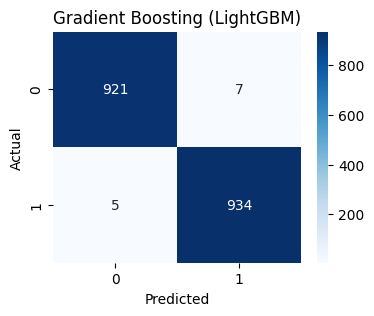

Gradient Boosting (XGBoost) metrics:
Precision: 98.83843717001056
Recall: 99.68051118210862
F1-Score: 99.25768822905621
Accuracy: 99.25013390465989


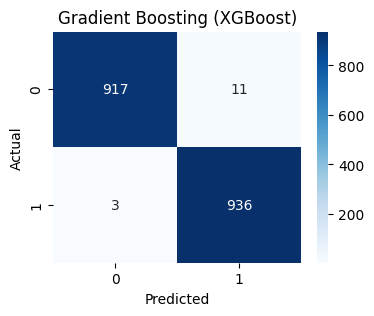

CatBoost metrics:
Precision: 99.46977730646871
Recall: 99.89350372736953
F1-Score: 99.68119022316685
Accuracy: 99.67862881628281


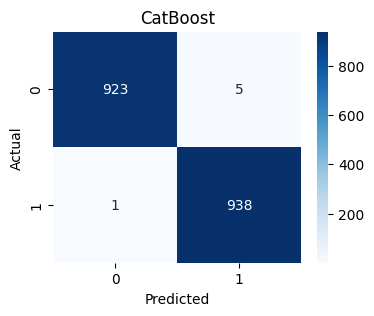

In [122]:
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


def evaluate_and_visualize(actual_labels, predicted_labels, model_name):
    # Метрики
    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels)
    recall = recall_score(actual_labels, predicted_labels)
    f1 = f1_score(actual_labels, predicted_labels)
    
    print(f"{model_name} metrics:")
    print(f"Precision: {precision * 100}")
    print(f"Recall: {recall * 100}")
    print(f"F1-Score: {f1 * 100}")
    print(f"Accuracy: {accuracy * 100}")

    cm = confusion_matrix(actual_labels, predicted_labels)
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name}')
    plt.show()
    
features = train_load.drop(columns=['LoanApproved']).astype(float)
target = train_load['LoanApproved'].astype(float)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train).astype(float)
features_test_scaled = scaler.transform(features_test).astype(float)


# Custom Linear Model
custom_model = SimpleLinearModel()
custom_model.train(features_train_scaled, target_train)
pred_custom_model = custom_model.classify(features_test_scaled)
evaluate_and_visualize(target_test, pred_custom_model, "Simple Linear Model")

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(features_train_scaled, target_train)
pred_logistic_model = logistic_model.predict(features_test_scaled)
evaluate_and_visualize(target_test, pred_logistic_model, "Logistic Regression")

# SVM
svm_model = SVC(probability=True)
svm_model.fit(features_train_scaled, target_train)
pred_svm_model = svm_model.predict(features_test_scaled)
evaluate_and_visualize(target_test, pred_svm_model, "SVM")

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(features_train_scaled, target_train)
pred_decision_tree = decision_tree_model.predict(features_test_scaled)
evaluate_and_visualize(target_test, pred_decision_tree, "Decision Tree")

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(features_train_scaled, target_train)
pred_random_forest = random_forest_model.predict(features_test_scaled)
evaluate_and_visualize(target_test, pred_random_forest, "Random Forest")

# Gradient Boosting (sklearn)
sklearn_boosting_model = GradientBoostingClassifier()
sklearn_boosting_model.fit(features_train_scaled, target_train)
pred_sklearn_boosting = sklearn_boosting_model.predict(features_test_scaled)
evaluate_and_visualize(target_test, pred_sklearn_boosting, "Gradient Boosting (sklearn)")

# Gradient Boosting (LightGBM)
lightgbm_model = LGBMClassifier(force_col_wise=True)
lightgbm_model.fit(features_train_scaled, target_train)
pred_lightgbm = lightgbm_model.predict(features_test_scaled)
evaluate_and_visualize(target_test, pred_lightgbm, "Gradient Boosting (LightGBM)")

# Gradient Boosting (XGBoost)
xgboost_model = XGBClassifier(eval_metric='logloss')
xgboost_model.fit(features_train_scaled, target_train)
pred_xgboost = xgboost_model.predict(features_test_scaled)
evaluate_and_visualize(target_test, pred_xgboost, "Gradient Boosting (XGBoost)")

# CatBoost
catboost_model = CatBoostClassifier(verbose=False)
catboost_model.fit(features_train_scaled, target_train)
pred_catboost = catboost_model.predict(features_test_scaled)
evaluate_and_visualize(target_test, pred_catboost, "CatBoost")
